### Initialization

In [ ]:
!pip install geemap >> /dev/null
!pip install pycrs >> /dev/null

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ee
import geemap
import random
import json
import os
import sys

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
ee.Authenticate()
ee.Initialize(project='[Add your GEE Project ID]') ### Add your GEE Project ID ###

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folderPATH = '/content/drive/MyDrive/AIT_KHM/ForGitHub/'  ### Change GDrive path to folder where TSClusterer.py is located ###

sys.path.append(folderPATH)
os.chdir(folderPATH)

In [ ]:
%load_ext autoreload
%autoreload 2

### Analysis

In [ ]:
aoi = geemap.shp_to_ee('/content/drive/MyDrive/AIT_KHM/ForGitHub/data_aoi/kampong_thom.shp') ### Link to study area polygon shapefile ###
gd_data = geemap.shp_to_ee('/content/drive/MyDrive/AIT_KHM/ForGitHub/data_gt/kampong_thom_gt.shp')  ### Link to additional GT data point shapefile, if available ###

print('Number of additional GT data point:', gd_data.size().getInfo())

Number of additional GT data point: 6126


In [ ]:
import TSClusterer

In [ ]:
### Edit here ###

startYear = 2013 # start year of the analysis
endYear = 2024 # end year of the analysis
cloudTH = 20 # allowed cloud percentage to filter the image collection
percentReductionTH = 60 # percentage value to reduce each year's image collection

khm_clusterer = TSClusterer.TSClusterer(aoi, startYear, endYear, cloudTH=cloudTH, percentReductionTH=percentReductionTH, verbose=True)

## Image availability by year.
Image for the year 2013 found.
Image for the year 2014 found.
Image for the year 2015 found.
Image for the year 2016 found.
Image for the year 2017 found.
Image for the year 2018 found.
Image for the year 2019 found.
Image for the year 2020 found.
Image for the year 2021 found.
Image for the year 2022 found.
Image for the year 2023 found.
Image for the year 2024 found.


In [ ]:
### Visualizing RGB image year by year to check quality. ###

imageTemp = khm_clusterer.getRGBImageByYear(year=2021)

Map = geemap.Map(center = [12.5657,104.9910], zoom = 7)
vis_Para = {'min':0.0,'max':0.3,'bands':['R', 'G', 'B'], 'gamma': 1.5}
Map.addLayer(imageTemp, vis_Para, name="TEMP")
Map.addLayer(aoi, {}, name="Study Area")
Map

## Selecting image for year 2021.
## If image is cloudy, corresponding NDVI image can be removed before modelling using 'removeNDVIImageByYear' function.


Map(center=[12.5657, 104.991], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDa…

In [ ]:
### If a image has too much cloud, it can be removed by below code ###

khm_clusterer.removeNDVIImageByYear(2016)

## NDVI image for year 2016 was removed.


## 12251 GT points were created.
## Data is clustered with 5 Clusters via K-Mean.


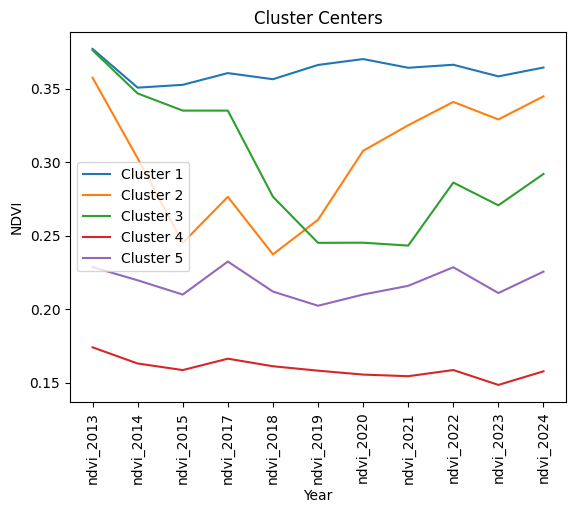

In [ ]:
khm_clusterer.generateGTData(numRandPixels=6126, additionalGTPoints=gd_data, verbose=True)

khm_clusterer.clusterViaKMean(nClusters=5, verbose=True)
khm_clusterer.plotClusterCentersKMean()

### To use VQVAE algorithm instead of KMean, use below code and comment above 2 lines of code. ###

# khm_clusterer.clusterViaVQVAE(dataCSVPath='/content/TEMP1.csv', scalingPerc=[2,98], rmseLossW=100, nClusters=6, epochs=100,verbose=True)
# khm_clusterer.plotClusterCentersVQVAE()

In [ ]:
### Merge relevent clusters by passing list of relevent cluster ids as below. ###

khm_clusterer.mergeRelevantClusters([2,3])

clusteredImg = khm_clusterer.getClusteredResult()
finalImg = khm_clusterer.getFinalResult()

## Clusters, except for [2, 3] were masked out.


In [ ]:
Map = geemap.Map(center = [12.5657,104.9910], zoom = 7)
vis_Para = {'min': 1, 'max': 5, 'palette':['green','red','blue','yellow','gray']}
Map.addLayer(aoi, {}, name="Study Area")
Map.addLayer(clusteredImg, vis_Para, name="Clustered Image")
Map.addLayer(finalImg, vis_Para, name="Merged Image")
Map

Map(center=[12.5657, 104.991], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDa…

In [ ]:
khm_clusterer.exportOutput(outputFileName='result_kampong_thom')

Task submitted! Task ID: WCUW7DIGUBBAXJ4KV35DLLVW
/ Exporting to GDrive...
Export completed successfully!
